# Test of algorithm steps

In [ ]:
import numpy as np
import os

if os.getcwd()[-9:]=="notebooks":
    os.chdir("..")

import sMZI_copy as itf

In [2]:
def print_matrix(M: np.ndarray, prec: int=2):
    """
    Function to print a given matrix in a nice way.
    
    Parameters
    ------
    M : matrix to print
    prec : floating point precision
    """
    for row in M:
        print(f"{np.array2string(row, precision=prec ,formatter={'float': lambda row: f'{row:.2f}'},separator=', ')}")
    print('\n')

def print_data_ext_ps(V1: np.complex_, V2: np.complex_):
    """
    Function to print data on the effect of the external phaseshift
    that's used to match the phases of two given elements.
    
    Parameters
    ------
    V1 : element of the auxillary matrix `V`
    V2 : subsequent element of **V1**
    
    ---
    
    Further description:
    ---
    When it comes to the effect of the external phaseshift  `P`:
    
    - for **even** diagonals ( j=2,4... ):
    >> ``V1 = V[x,y]`` ,  ``V2 = V[x-1,y]``
    
    - for **odd** diagonals ( j=1,3... ):
    >> ``V1 = V[x,y]`` ,  ``V2 = V[x,y+1]``
    
    ---
    When it comes to the effect of `exp(i*summa)` in `M`:
    
    - for **even** diagonals ( j=2,4... ):
    >> ``V1 = V[x-1,y-1]`` ,  ``V2 = V[x-1,y]``
    
    - for **odd** diagonals ( j=1,3... ):
    >> ``V1 = V[x+1,y+1]`` ,  ``V2 = V[x,y+1]``
    
    """
    
    eq_stat = ((np.angle(V1) - np.angle(V2)).round(10) == 0)
    eq_str = "\nThey are matching!"
    neq_str = "\nThey are NOT matching!\n"

    print('Affected elements:\t',
        "{:.2f}, {:.2f}".format(V1, V2))
    print('Corresponding angles:\t',
        "{:.2f}, {:.2f}".format(np.angle(V1), np.angle(V2)))

    if eq_stat:
        print(eq_str)
    else:
        print(neq_str)
        print('Full length of angles:\n',
            "{}, {}".format(np.angle(V1), np.angle(V2)))
        print('\nTheir difference:\t',
            "{}".format(np.angle(V1) - np.angle(V2)))

In [3]:
U = itf.random_unitary(4)

## Odd diagonals

### Finding external phaseshifts
They match the given elements' phases

In [ ]:
V = np.conjugate(U.T)
# odd diags: 1,3,5...
m = U.shape[0]
j = 1

x = m-1
y = j-1
s = y+1

P = itf.external_ps(m, s, V[x,y], V[x,y+1])
# print('old V:\n')
# print_matrix(V)
V = np.matmul(V,P)
# print("NOTE: {}. column was affected!".format(j+1))
# print('new V:\n')
# print_matrix(V)

print_data_ext_ps(V[x,y],V[x,y+1])

### Finding internal phaseshifts
$\delta$ and $\sum$

In [ ]:
# looking at odd diagonal version!

# minus sign ! Note that the function custom_arctan(V1,V2) computes the arctan of -V1/V2 !
delta = itf.custom_arctan(V[x,y+1], V[x,y])

print("delta:\t{:.2f}\t -> real: {}\nangle:\t{}°".format(
    delta, not np.iscomplex(delta), np.angle(delta,True)))

# if k == j: summ = 0
summ = 0

#compute the angles theta1 and theta2:
theta1 = delta-summ
theta2 = 2*summ-theta1
print('Check internal phases')
print((theta1+theta2)/2-summ)
print((theta1-theta2)/2-delta)

# might need to change into 'k' dependence
modes = [y, y+1]    # initial mode-pairs    NOTE: need to update it to x,y dependence
M = np.eye(m, dtype=np.complex_)
M[modes[0],modes[0]] =  np.sin(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[1],modes[0]] =  np.cos(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[0],modes[1]] =  np.cos(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[1],modes[1]] = -np.sin(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)

print('\nBlock of M:\n')
print_matrix(M[y:y+2,y:y+2])


# print('old V:\n')
# print_matrix(V)
V = np.matmul(V,M)
# print("NOTE: {}. and {}. column were affected!".format(j,j+1))
# print('new V:\n')
print_matrix(V)

In [ ]:
print("Nulled element:\tRe({:.2f}) Im({:.2f})".format(V[x,y].real, V[x,y].imag))
print("abs: {:.2f}, angle: {:.2f}°\n".format(np.abs(V[x,y]), np.angle(V[x,y],True)))
# print('Elements affected by e^(i*summ)')
# print_data_ext_ps(V[x-1,y], V[x-1,y+1])

## Even diagonals

### Finding external phaseshifts
They match the given elements' phases

In [ ]:
# V = np.conjugate(U.T)
# even diags: 2,4,6...
m = U.shape[0]
j = 2

x = m-j
y = 0
s = x-1

P = itf.external_ps(m, s, V[x,y], V[x-1,y])
# print('old V:\n')
# print_matrix(V)
V = np.matmul(P,V)
# print("NOTE: {}. row was affected!".format(j+1))
# print('new V:\n')
# print_matrix(V)

print_data_ext_ps(V[x,y],V[x-1,y])

In [ ]:
#My ansatz

# V = np.conjugate(U.T)
# even diags: 2,4,6...
m = U.shape[0]
j = 2

x = m-j
y = 0

P = itf.external_ps(m, 0, V[x,y], V[x-1,y]) #ToDo: Find out the logic where to put the external PS!
# print('old V:\n')
print_matrix(P)
V = np.matmul(P,V)
# print("NOTE: {}. row was affected!".format(j+1))
# print('new V:\n')
# print_matrix(V)

print_data_ext_ps(V[x,y],V[x-1,y])

### Finding internal phaseshifts
$\delta$ and $\sum$

In [ ]:
x

In [ ]:
# looking at odd diagonal version!

# minus sign !
delta = itf.custom_arctan(-V[x-1,y], V[x,y])

print("delta:\t{:.2f}\t -> real: {}\nangle:\t{}°".format(
    delta, not np.iscomplex(delta), np.angle(delta,True)))

summ = np.angle(V[x+1,y+1]) - np.angle(V[x-1,y+1]*np.cos(delta) - V[x,y+1]*np.sin(delta)) + np.pi/2

# print('\nangles to get equal by summa:\n',
#       np.angle(V[x+1,y+1]),
#       np.angle(V[x,y+1]*np.cos(delta) - V[x+1,y+1]*np.sin(delta)),'\n',
#       'summa:',summ)

# summ = 0

# might need to change into 'k' dependence
modes = [x-1, x]    # initial mode-pairs    NOTE: need to update it to x,y dependence
M = np.eye(m, dtype=np.complex_)
M[modes[0],modes[0]] =  np.sin(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[1],modes[0]] =  np.cos(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[0],modes[1]] =  np.cos(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[1],modes[1]] = -np.sin(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)

# print('\nBlock of M:\n')
# print_matrix(M[x-1:x+1,x-1:x+1])
# print_matrix(M)


# print('old V:\n')
# print_matrix(V)
V = np.matmul(M,V)
# print("NOTE: {}. and {}. rows were affected!".format(j,j+1))
# print('new V:\n')
# print_matrix(V)

In [ ]:
print("Nulled element:\tRe({:.2f}) Im({:.2f})".format(V[x,y].real, V[x,y].imag))
print("abs: {:.2f}, angle: {:.2f}°\n".format(np.abs(V[x,y]), np.angle(V[x,y],True)))
print('Elements affected by e^(i*summ):\n')
print_data_ext_ps(V[x+1,y+1], V[x,y+1])

### Continuation on the chosen diagonal
Without correct $\sum$ it's wrong

In [ ]:
x += 1
y += 1

delta = itf.custom_arctan(-V[x-1,y], V[x,y])
print("delta:\t{:.2f}\t -> real: {}\nangle:\t{}°".format(
    delta, not np.iscomplex(delta), np.angle(delta,True)))

summ = 0

modes = [x-1, x]     # initial mode-pairs
M = np.eye(m, dtype=np.complex_)
M[modes[0],modes[0]] =  np.sin(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[1],modes[0]] =  np.cos(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[0],modes[1]] =  np.cos(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[1],modes[1]] = -np.sin(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)

# print('\nBlock of M:\n')
# print_matrix(M[x-1:x+1,x-1:x+1])

# print('old V:\n')
# print_matrix(V)
V = np.matmul(M,V)
# print("NOTE: {}. and {}. rows were affected!".format(x,x+1))
# print('new V:\n')
# print_matrix(V)

In [ ]:
print("Nulled element:\tRe({:.2f}) Im({:.2f})".format(V[x,y].real, V[x,y].imag))
print("abs: {:.2f}, angle: {:.2f}°\n".format(np.abs(V[x,y]), np.angle(V[x,y],True)))
# print('Elements affected by e^(i*summ)')
# print_data_ext_ps(V[x-1,y], V[x-1,y+1])

In [ ]:
print_matrix(V.round(10))

## Odd diagonal 2.
Diagonal with more than one element

### Finding external phaseshifts
They match the given elements' phases

In [ ]:
# odd diags: 1,3,5...
m = U.shape[0]
j = 3

x = m-1
y = j-1
s = y+1

P = itf.external_ps(m, s, V[x,y], V[x,y+1])
# print('old V:\n')
# print_matrix(V)
V = np.matmul(V,P)
# print("NOTE: {}. column was affected!".format(j+1))
# print('new V:\n')
# print_matrix(V)

print_data_ext_ps(V[x,y],V[x,y+1])
print_matrix(V)

### Finding internal phaseshifts
$\delta$ and $\sum$

In [ ]:
# looking at odd diagonal version!

# minus sign !
delta = itf.custom_arctan(V[x,y+1], V[x,y])

print("delta:\t{:.2f}\t -> real: {}\nangle:\t{}°".format(
    delta, not np.iscomplex(delta), np.angle(delta,True)))

# if k == j: summ = 0
summ = np.angle(V[x-1,y-1]) - np.angle(V[x-1,y]*np.sin(delta) + V[x-1,y+1]*np.cos(delta)) + np.pi/2

# might need to change into 'k' dependence
modes = [y, y+1]    # initial mode-pairs    NOTE: need to update it to x,y dependence
M = np.eye(m, dtype=np.complex_)
M[modes[0],modes[0]] =  np.sin(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[1],modes[0]] =  np.cos(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[0],modes[1]] =  np.cos(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[1],modes[1]] = -np.sin(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)

print('\nBlock of M:\n')
print_matrix(M[y:y+2,y:y+2])
print_matrix(M)

# print('old V:\n')
# print_matrix(V)
V = np.matmul(V,M)
# print("NOTE: {}. and {}. column were affected!".format(j,j+1))
# print('new V:\n')
print(np.angle(V[2][1]),np.angle(V[2][2]))

In [ ]:
print("Nulled element:\tRe({:.2f}) Im({:.2f})".format(V[x,y].real, V[x,y].imag))
print("abs: {:.2f}, angle: {:.2f}°\n".format(np.abs(V[x,y]), np.angle(V[x,y],True)))
# print('Elements affected by e^(i*summ)')
# print_data_ext_ps(V[x-1,y], V[x-1,y+1])

In [ ]:
x -= 1
y -= 1

delta = itf.custom_arctan(V[x,y+1], V[x,y])

print("delta:\t{:.2f}\t -> real: {}\nangle:\t{}°".format(
    delta, not np.iscomplex(delta), np.angle(delta,True)))

# if k == j: summ = 0
summ = np.angle(V[x-1,y-1]) - np.angle(V[x-1,y]*np.sin(delta) + V[x-1,y+1]*np.cos(delta)) + np.pi/2

# might need to change into 'k' dependence
modes = [y, y+1]    # initial mode-pairs    NOTE: need to update it to x,y dependence
M = np.eye(m, dtype=np.complex_)
M[modes[0],modes[0]] =  np.sin(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[1],modes[0]] =  np.cos(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[0],modes[1]] =  np.cos(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[1],modes[1]] = -np.sin(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)

print('\nBlock of M:\n')
print_matrix(M[y:y+2,y:y+2])


# print('old V:\n')
# print_matrix(V)
V = np.matmul(V,M)
# print("NOTE: {}. and {}. column were affected!".format(j,j+1))
# print('new V:\n')
print_matrix(V)
print(np.angle(V[1][0]),np.angle(V[1][1]))

In [ ]:
print("Nulled element:\tRe({:.2f}) Im({:.2f})".format(V[x,y].real, V[x,y].imag))
print("abs: {:.2f}, angle: {:.2f}°\n".format(np.abs(V[x,y]), np.angle(V[x,y],True)))
# print('Elements affected by e^(i*summ)')
# print_data_ext_ps(V[x-1,y], V[x-1,y+1])

In [ ]:
x -= 1
y -= 1

delta = itf.custom_arctan(V[x,y+1], V[x,y])

print("delta:\t{:.2f}\t -> real: {}\nangle:\t{}°".format(
    delta, not np.iscomplex(delta), np.angle(delta,True)))

# if k == j: summ = 0
#summ = np.angle(V[x-1,y-1]) - np.angle(V[x-1,y]*np.sin(delta) + V[x-1,y+1]*np.cos(delta))
summ = 0

# might need to change into 'k' dependence
modes = [y, y+1]    # initial mode-pairs    NOTE: need to update it to x,y dependence
M = np.eye(m, dtype=np.complex_)
M[modes[0],modes[0]] =  np.sin(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[1],modes[0]] =  np.cos(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[0],modes[1]] =  np.cos(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)
M[modes[1],modes[1]] = -np.sin(delta) * np.exp(1j*summ) * np.exp(1j*np.pi/2)

print('\nBlock of M:\n')
print_matrix(M[y:y+2,y:y+2])


# print('old V:\n')
# print_matrix(V)
V = np.matmul(V,M)
# print("NOTE: {}. and {}. column were affected!".format(j,j+1))
# print('new V:\n')
# print_matrix(V)

In [ ]:
print(x,y)
V.round(3)

now we implement the other external phases which are shifted to the middle

In [ ]:
m = 4
for j in range(2,m+1):
   # xi = np.angle(V[0][0])-np.angle(V[j-1][j-1])
    V = np.dot(V,itf.external_ps(m, j-1, V[0,0], V[j-1,j-1]))
print_matrix(V.round(10))

# Test of module
## <center>TODO</center>
- &#x2611; check if $V$ is a diagonal matrix after the decomposition
---
- &#x2610; extend module to save found phases: $\phi$, $\delta$, $\sum$ $\Rightarrow$ $\theta_1$ & $\theta_2$ $\rightarrow$ done, but maybe needs to be adapted
- &#x2610; check the function in module that recreates the initial unitary matrix based on the decomposed matrices (probably needs work)
- &#x2610; update the drawing function in the module such that it follows the updated **Clement's** `draw()` function but with sMZI:s
- &#x2610; Finally: sweep through the whole module and finalise *comments*, *documentation*, *variables* and implement possible *optimalisations*
---
- &#x2610; optional: `import numba` for faster execution; optimized machine code at runtime

In [1]:
# including imports again in case someone only wishes
# to run this part of the notebook
import numpy as np
import os

if os.getcwd()[-9:]=="notebooks":
    os.chdir("..")

import sMZI as itf

def print_matrix(M: np.ndarray, prec: int=2):
    """
    Function to print a given matrix in a nice way.
    
    Parameters
    ------
    M : matrix to print
    prec : floating point precision
    """
    for row in M:
        print(f"{np.array2string(row, precision=prec ,formatter={'float': lambda row: f'{row:.2f}'},separator=', ', suppress_small=True)}")
    print('\n')

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)


U = itf.random_unitary(5)
I = itf.square_decomposition(U)

# I.draw()

## ``Interferometer.draw()`` to be updated!

Figuring out the final structure of the circuit:

In [2]:
print("number of output phases: {}\nnumber of input phases: {}".format(np.count_nonzero(I.output_phases),np.count_nonzero(I.input_phases)))
print("\nThe matrix encrypting the circuit after Bell's PS shifting:\n")
print_matrix(I.circuit)
print("The full circuit:\n",I.circuit_prep())

number of output phases: 2
number of input phases: 2

The matrix encrypting the circuit after Bell's PS shifting:

[-2.78+0.j,  0.4 +0.j, -0.35-0.j, -2.59+0.j,  4.45+0.j]
[-1.16-0.j,  2.98+0.j,  2.4 +0.j, -6.12+0.j,  3.15-0.j]
[-3.75+0.j,  5.19-0.j,  2.16-0.j, -6.47-0.j, -1.52+0.j]
[-2.64-0.j, -4.11+0.j,  1.44+0.j, -1.4 +0.j, -2.59-0.j]
[ 0.17+0.j, -5.27-0.j,  3.12+0.j, -1.74-0.j,  0.  +0.j]


The full circuit:
 [  External PS on mode 1 with angle 	 phi: 0.46

  External PS on mode 3 with angle 	 phi: 1.00

  MZI between modes 0 and 1:
  The angle on 0: -2.78+0.00j
  The angle on 1: -1.16-0.00j
                                MZI between modes 2 and 3:
                                The angle on 2: -3.75+0.00j
                                The angle on 3: -2.64-0.00j

  External PS on mode 4 with angle 	 phi: 0.17+0.00j

  MZI between modes 1 and 2:
  The angle on 1: 2.98+0.00j
  The angle on 2: 5.19-0.00j
                               MZI between modes 3 and 4:
                   

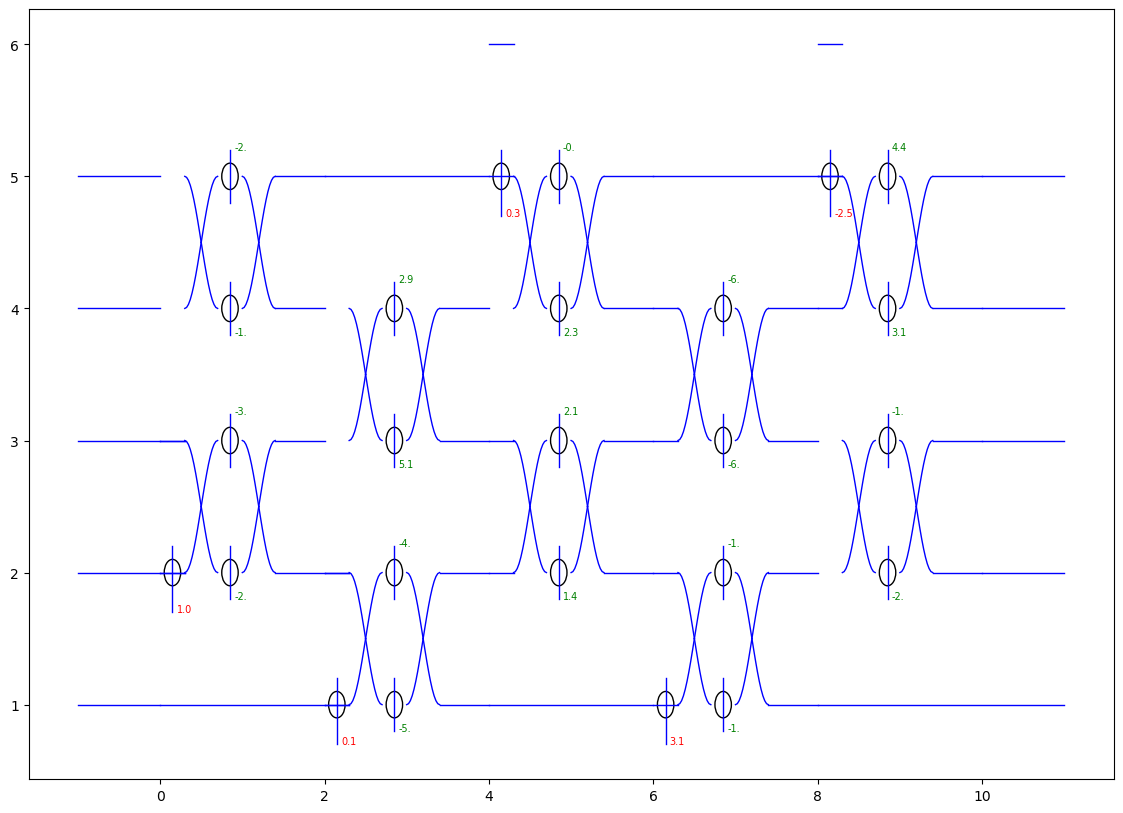

In [3]:
I.draw()